<a href="https://colab.research.google.com/github/hsiuliwang/ai/blob/main/detection_add_hat(frame).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2021-06-23 08:13:22--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240458 (235K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 234.82K  --.-KB/s    in 0.01s   

2021-06-23 08:13:22 (15.4 MB/s) - ‘test.jpg’ saved [240458/240458]

--2021-06-23 08:13:22--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

# *****記得上傳帽子的圖片並命名為hat2.jpg*****

In [44]:
import cv2
import sys
import logging as log
import datetime as dt
from time import sleep
import numpy as np
import os
import subprocess

#cascPath = "haarcascade_frontalface_default.xml"  # for face detection

#if not os.path.exists(cascPath):
 #   subprocess.call(['/content/download_filters.sh'])
#else:
 #   print('Filters already exist!')

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#faceCascade = cv2.CascadeClassifier(cascPath)
log.basicConfig(filename='webcam.log',level=log.INFO)
anterior = 0
mst = cv2.imread('moustache.png')
oldhat = cv2.imread('cowboy_hat.png')
dog = cv2.imread('dog_filter.png')
#帽子的圖片路徑從此處更改
hat = cv2.imread('hat2.png')

def put_moustache(mst,fc,x,y,w,h):
    
    face_width = w
    face_height = h

    mst_width = int(face_width*0.4166666)+1
    mst_height = int(face_height*0.142857)+1



    mst = cv2.resize(mst,(mst_width,mst_height))

    for i in range(int(0.62857142857*face_height),int(0.62857142857*face_height)+mst_height):
        for j in range(int(0.29166666666*face_width),int(0.29166666666*face_width)+mst_width):
            for k in range(3):
                if mst[i-int(0.62857142857*face_height)][j-int(0.29166666666*face_width)][k] <235:
                    fc[y+i][x+j][k] = mst[i-int(0.62857142857*face_height)][j-int(0.29166666666*face_width)][k]
    return fc

def put_hat(hat,fc,x,y,w,h):
    
    face_width = w
    face_height = h
    
    hat_width = face_width+1
    hat_height = int(0.35*face_height)+1
    
    hat = cv2.resize(hat,(hat_width,hat_height))
    
    for i in range(hat_height):
        for j in range(hat_width):
            for k in range(3):
                if hat[i][j][k]<235:
                    fc[y+i-int(0.25*face_height)][x+j][k] = hat[i][j][k]
    return fc

def put_dog_filter(dog,fc,x,y,w,h):
    face_width = w
    face_height = h
    
    dog = cv2.resize(dog,(int(face_width*1.5),int(face_height*1.75)))
    for i in range(int(face_height*1.75)):
        for j in range(int(face_width*1.5)):
            for k in range(3):
                if dog[i][j][k]<235:
                    fc[y+i-int(0.375*h)-1][x+j-int(0.25*w)][k] = dog[i][j][k]
    return fc
    
    
    


In [45]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

#呼叫鏡頭之副程式

In [46]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [47]:
#創建存放資料夾
!mkdir result

mkdir: cannot create directory ‘result’: File exists


In [49]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
num_frame =0
ch =1
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
          gray,
          scaleFactor=1.1,
          minNeighbors=5,
          minSize=(40,40)
      )
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.putText(frame,"Person Detected",(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
          
        if ch==2:
            frame = put_moustache(mst,frame,x,y,w,h)
        elif ch==1:
            frame = put_hat(hat,frame,x,y,w,h)
        elif ch==3:
            frame = put_moustache(mst,frame,x,y,w,h)
            frame = put_hat(hat,frame,x,y,w,h)
        else:
            frame = put_dog_filter(dog,frame,x,y,w,h)
              
              
              
    if anterior != len(faces):
        anterior = len(faces)
        log.info("faces: "+str(len(faces))+" at "+str(dt.datetime.now()))

    cv2.imwrite("result/第{}幀.jpg".format(num_frame),frame)

    num_frame = num_frame +1

<IPython.core.display.Javascript object>

#結果會在此處：
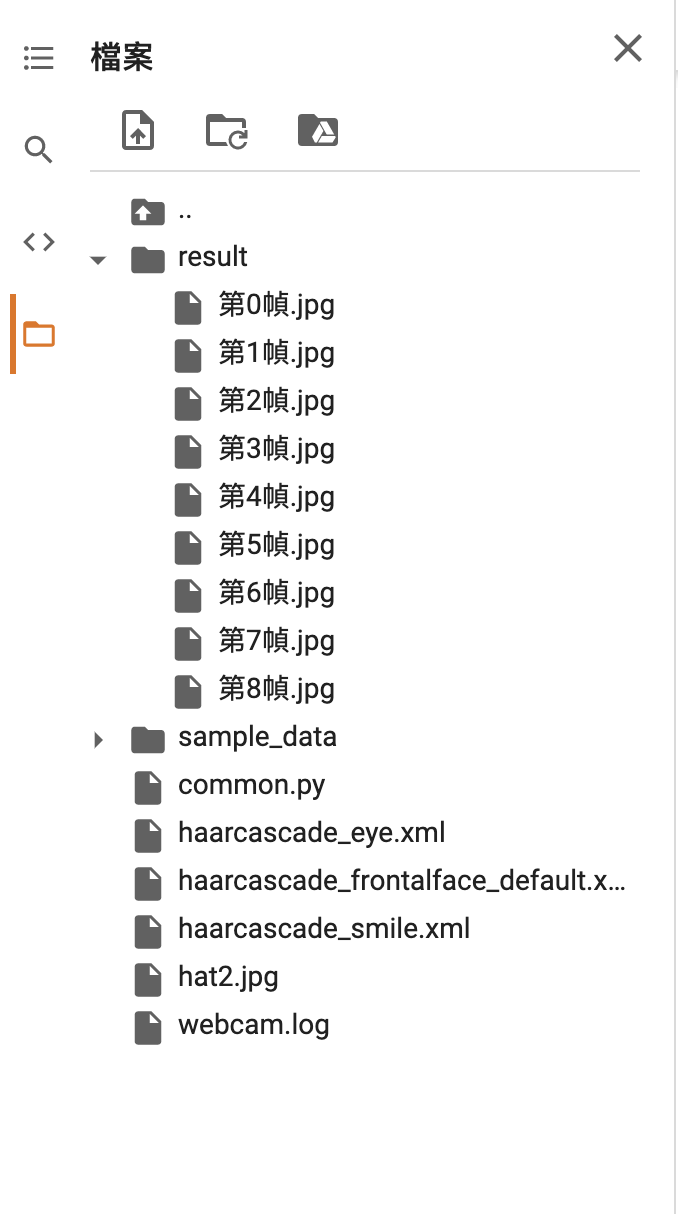
